In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [39]:
df.skew()

,0
Time,-0.035568
V1,-3.280667
V2,-4.624866
V3,-2.240155
V4,0.676292
V5,-2.425901
V6,1.826581
V7,2.553907
V8,-8.521944
V9,0.554680


In [40]:
x=df.iloc[:,0:30]
y=df.iloc[:,-1]

In [41]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [45]:
y_pred=classifier.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[1 0 0 ... 0 0 0]
0.999420666409185
[[56849    15]
 [   18    80]]


In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=None,
)
classifier1.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
y_pred_rtc=classifier1.predict(x_test)
print(y_pred_rtc)

[1 0 0 ... 0 0 0]


In [55]:
print(accuracy_score(y_test,y_pred_rtc))

0.9996137776061234


[[56859     5]
 [   33    65]]


<Axes: >

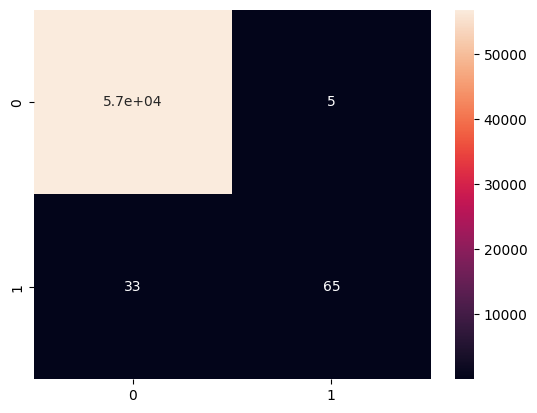

In [49]:
print(confusion_matrix(y_test,y_pred_rtc))
sns.heatmap(confusion_matrix(y_test,y_pred_rtc),annot=True)

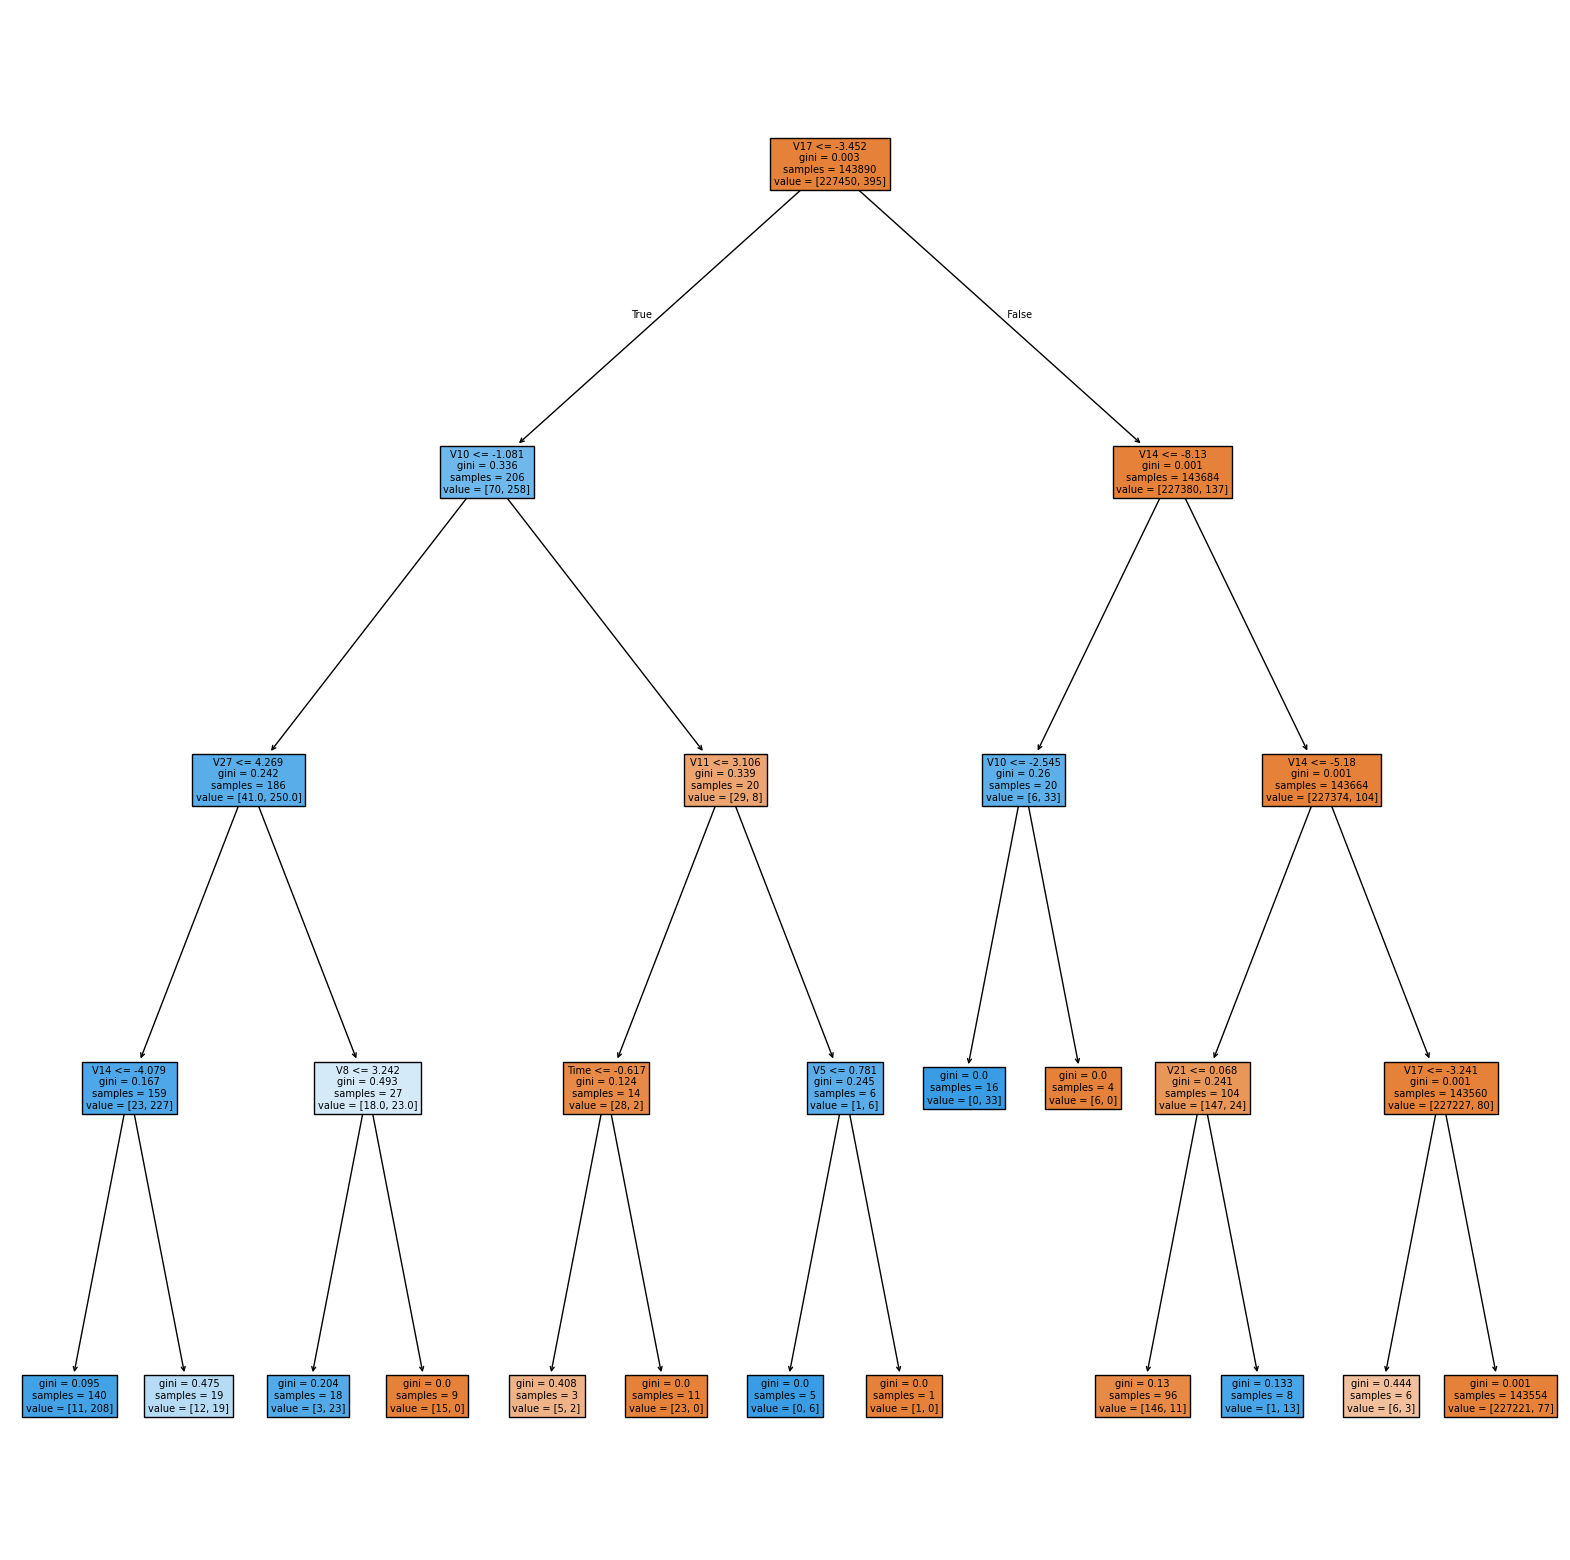

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(classifier1.estimators_[0],filled=True,feature_names=x.columns,)
plt.show()